# Hotel Bookings Analysis
### Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate?What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use("ggplot")

In [3]:
data = pd.read_csv("Hotel Bookings.csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# 1. There are two types of hotels in the dataset, which type of hotels booked most? Plot a pie chart to show the results.

We'll calculate the total number of bookings for each hotel type and create a pie chart.

In [5]:
print(data["hotel"].unique())

['Resort Hotel' 'City Hotel']


In [6]:
rh_all = data[data["hotel"] == "Resort Hotel"]["hotel"].count()
rh_canceled = data[(data["hotel"] == "Resort Hotel")&(data["is_canceled"] == 1)]["hotel"].count()

ch_all = data[data["hotel"] == "City Hotel"]["hotel"].count()
ch_canceled = data[(data["hotel"] == "City Hotel")&(data["is_canceled"] == 1)]["hotel"].count()

print(rh_all, ch_all)

40060 79330


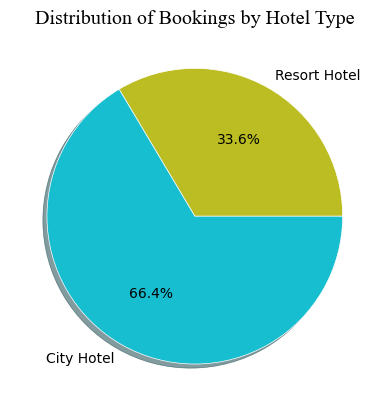

In [7]:
tab20 = plt.color_sequences["tab20"]
colors = [tab20[i] for i in [16, 18]]

ax1 = plt.pie([rh_all, ch_all], labels=["Resort Hotel","City Hotel"], colors= colors, autopct='%1.1f%%',
               wedgeprops=dict(edgecolor="w"), shadow=True)

plt.title("Distribution of Bookings by Hotel Type", fontname="Times New Roman")
plt.show()

From the analysis:

- City Hotel accounts for 79,330 bookings (approximately 66.5%).
- Resort Hotel accounts for 40,060 bookings (approximately 33.5%).

City Hotels were booked more frequently.

# 2. What percentage of bookings were cancelled? What type of chart do you suggest to show the results?

Let’s calculate the cancellation percentage and suggest a suitable chart for visualization.

In [8]:
canceled = ((rh_canceled + ch_canceled) / (rh_all+ch_all)) * 100 
not_canceled = 100 - canceled
canceled

37.041628277075134

Approximately 37.04% of bookings were canceled.

A bar chart or would be suitable to display the percentage of canceled vs. non-canceled bookings.

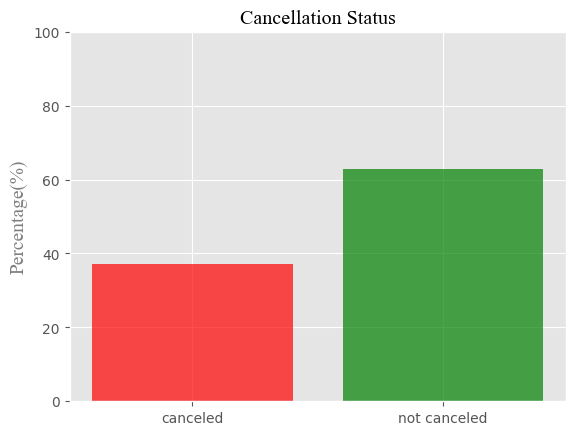

In [9]:
ax2 = plt.bar(["canceled","not canceled"], [canceled,not_canceled],color=(["r","g"]), alpha=0.7)
plt.title("Cancellation Status", fontname="Times New Roman")
plt.ylabel("Percentage(%)", fontname="Times New Roman", fontsize=14, color="grey")
plt.ylim(0,100)
plt.show()

The bar chart illustrates that:

 - 62.96% of bookings were not canceled.

 - 37.04% of bookings were canceled.


# 3. Based on different hotel types, what percentage of bookings were cancelled? What type of chart do you suggest to show the results?


we will calculate the cancellation rate for both hotel types.

In [10]:
rh_canceled = (rh_canceled / rh_all) * 100
rh_notcanceled = 100 - rh_canceled

ch_canceled = (ch_canceled / ch_all) * 100
ch_notcanceled = 100 - ch_canceled

print(rh_canceled, ch_canceled)

27.763354967548675 41.72696331778646


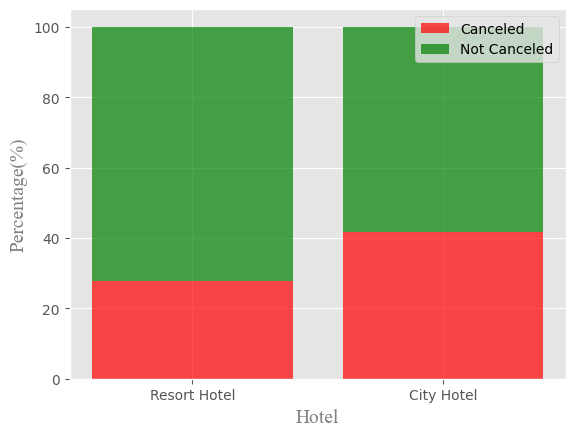

In [11]:
categories = ['Resort Hotel', 'City Hotel']
subcategories = ['Canceled', 'Not Canceled']
values = np.array([[rh_canceled,rh_notcanceled],[ch_canceled,ch_notcanceled]])

plt.bar(categories, [rh_canceled,ch_canceled], color="r", alpha=0.7)
plt.bar(categories, [rh_notcanceled,ch_notcanceled], bottom=[rh_canceled,ch_canceled],
        color="g", alpha=0.7)

plt.xlabel("Hotel", fontname="Times New Roman", fontsize=14, color="grey")
plt.ylabel("Percentage(%)", fontname="Times New Roman", fontsize=14, color="grey")
plt.legend(labels=subcategories)
plt.show()


The cancellation rates for each hotel type are:

 - City Hotel: 41.73%

 - Resort Hotel: 27.76%

This shows that cancellations are more common in City Hotels compared to Resort Hotels.

A **stacked bar chart**, as displayed, effectively shows this comparison.

# 4. In different years, what type of hotels were booked most and booked least? Draw a proper countplot to show the results.

We will create a count plot to visualize hotel bookings across different years.

In [12]:
data.groupby(["hotel", "arrival_date_year"]).size().unstack()

arrival_date_year,2015,2016,2017
hotel,,,
City Hotel,13682,38140,27508
Resort Hotel,8314,18567,13179


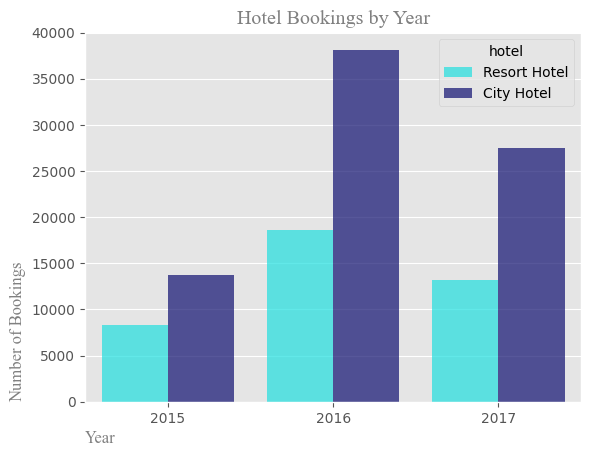

In [13]:
sns.countplot(data, x="arrival_date_year", hue="hotel", palette=["aqua","navy"], alpha=0.7)
plt.xlabel("Year", loc="left", color="gray", fontname="Times New Roman")
plt.ylabel("Number of Bookings", loc="bottom", color="gray", fontname="Times New Roman")
plt.title("Hotel Bookings by Year", color="gray", fontname="Times New Roman")
plt.show()


The count plot illustrates how the booking trends differ across years for City Hotels and Resort Hotels. We can observe which type of hotel was booked most or least in specific years:

- City Hotels consistently dominate bookings each year.
- Resort Hotels have fewer bookings compared to City Hotels annually.


# 5. According to different hotel types, how ‘adr’ changes in different months?

In [14]:
data['arrival_date_month'] = pd.Categorical(
    data['arrival_date_month'],
    categories=['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True
)

x = data.groupby(["hotel","arrival_date_month"], observed=True)["adr"].mean().unstack()
x

arrival_date_month,January,February,March,April,May,June,July,August,September,October,November,December
hotel,,,,,,,,,,,,
City Hotel,82.628986,85.088278,92.643116,111.251838,121.638560,119.074341,110.734292,114.680455,110.004661,99.974498,88.069601,88.826307
Resort Hotel,49.461883,55.171930,57.520147,77.849496,78.758134,110.444749,155.181299,186.790574,93.252030,62.097617,48.273993,68.984230


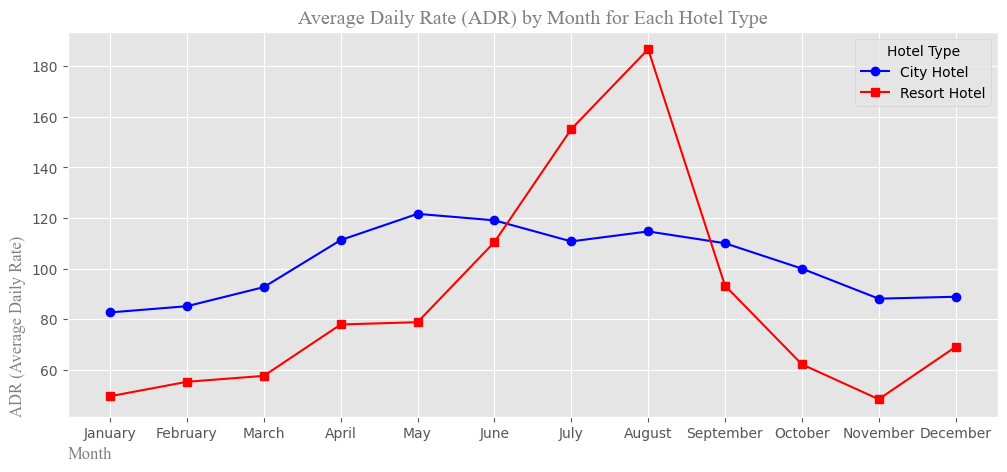

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(12,5)

ax.plot(x.loc["City Hotel"], marker="o", label="City Hotel", color="b")
ax.plot(x.loc["Resort Hotel"], marker= "s", label="Resort Hotel", color="r")

ax.set_xlabel('Month', loc="left", color="gray", fontname="Times New Roman")
ax.set_ylabel('ADR (Average Daily Rate)', loc="bottom", color="gray", fontname="Times New Roman")
ax.set_title('Average Daily Rate (ADR) by Month for Each Hotel Type', color="gray", fontname="Times New Roman")
ax.legend(title="Hotel Type")
plt.show()

The line chart shows the trends in the Average Daily Rate (ADR) for each month by hotel type:

- City Hotels generally have higher ADRs during the summer months (July and August).
- Resort Hotels experience a sharp increase in ADR during peak vacation months (July and August) but remain lower in off-peak months.

# 6. Check hotel wise daily rates mean, standard deviation, median, min and max.

Let’s calculate the mean, standard deviation, median, minimum, and maximum ADR for each hotel type.

In [16]:
data.groupby("hotel")["adr"].aggregate(["mean","std","median","min","max"])

,mean,std,median,min,max
hotel,,,,,
City Hotel,105.304465,43.602954,99.9,0.00,5400.0
Resort Hotel,94.952930,61.442418,75.0,-6.38,508.0


The statistics for the Average Daily Rate (ADR) by hotel type are as follows:

- City Hotel:

  - Mean: 105.30
  - Standard Deviation: 43.60
  - Median: 99.90
  - Min: 0.00
  - Max: 5400.00

- Resort Hotel:

  - Mean: 94.95
  - Standard Deviation: 61.44
  - Median: 75.00
  - Min: -6.38 (likely an outlier or error)
  - Max: 508.00

# 7. Extract the number of bookings per country and investigate that most of the guests are from which countries?

We'll count the number of bookings for each country and identify the top countries with the most guests.

In [17]:
data_cleaned = data.dropna(subset="country")

book_country = data_cleaned.groupby("country").size().sort_values(ascending=False)
book_country.head(10)

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
dtype: int64

C:\Users\R.A.B\AppData\Local\Temp\ipykernel_81732\3901695612.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=book_country[0:30], y=book_country[0:30].index, palette="GnBu_d")


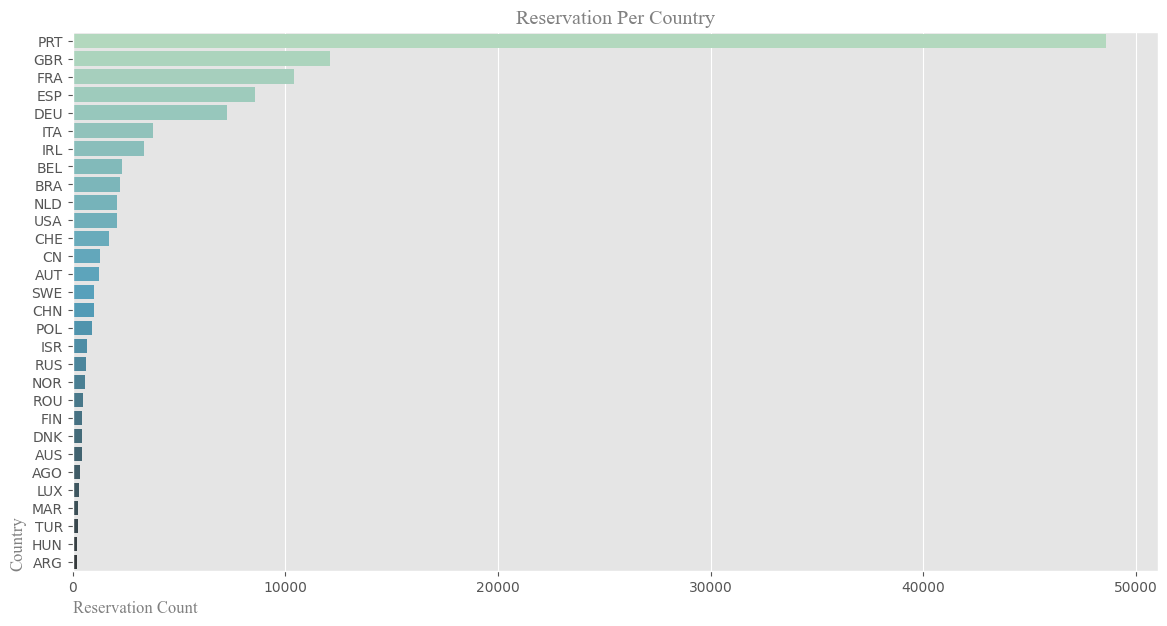

In [18]:
fig = plt.figure()
fig.set_size_inches(14,7)

sns.barplot(x=book_country[0:30], y=book_country[0:30].index, palette="GnBu_d")

plt.ylabel("Country", loc="bottom", color="gray", fontname="Times New Roman")
plt.xlabel("Reservation Count", loc="left", color="gray", fontname="Times New Roman")
plt.title("Reservation Per Country", color="gray", fontname="Times New Roman")
plt.show()

The top 10 countries with the most bookings are:

1. Portugal (PRT): 48,590 bookings
2. United Kingdom (GBR): 12,129 bookings
3. France (FRA): 10,415 bookings
4. Spain (ESP): 8,568 bookings
5. Germany (DEU): 7,287 bookings
6. Italy (ITA): 3,766 bookings
7. Ireland (IRL): 3,375 bookings
8. Belgium (BEL): 2,342 bookings
9. Brazil (BRA): 2,224 bookings
10. Netherlands (NLD): 2,104 bookings

Most guests are from Portugal (PRT).

# 8. According to the ‘market_segment’ most of the guests book their rooms on what channels?

We'll investigate which market segments (e.g., Online TA, Direct) are most popular for bookings.

In [19]:
book_channel = data.groupby("market_segment").size().sort_values(ascending=False)
book_channel

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
dtype: int64

C:\Users\R.A.B\AppData\Local\Temp\ipykernel_81732\3426150520.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=book_channel, y=book_channel.index, palette="GnBu_d")


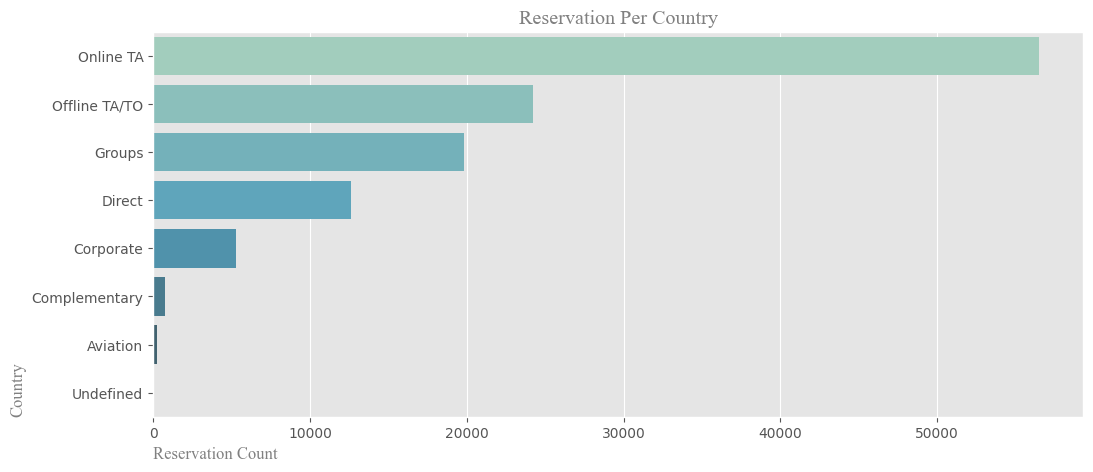

In [20]:
fig = plt.figure()
fig.set_size_inches(12,5)

sns.barplot(x=book_channel, y=book_channel.index, palette="GnBu_d")

plt.ylabel("Country", loc="bottom", color="gray", fontname="Times New Roman")
plt.xlabel("Reservation Count", loc="left", color="gray", fontname="Times New Roman")
plt.title("Reservation Per Country", color="gray", fontname="Times New Roman")
plt.show()

The most popular booking channels based on the market_segment are:

1. Online Travel Agents (Online TA): 56,477 bookings
2. Offline Travel Agents/TO (Offline TA/TO): 24,219 bookings
3. Groups: 19,811 bookings
4. Direct Bookings: 12,606 bookings
5. Corporate Bookings: 5,295 bookings

The majority of guests book through Online Travel Agents (Online TA).

# 9. Most of the guests perfer wich meal type?

## 📌 Meal Plan Codes  
| Code | Meaning |
|------|---------|
| **BB** | Bed & Breakfast |
| **HB** | Half Board (Breakfast + One Meal) |
| **FB** | Full Board (Breakfast + Lunch + Dinner) |
| **SC** | Self Catering (No Meals) |

In [21]:
data["meal"].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [22]:
meal_by_hotel = data.groupby(["hotel","meal"]).size().unstack()
meal_by_hotel

meal,BB,FB,HB,SC,Undefined
hotel,,,,,
City Hotel,62305.0,44.0,6417.0,10564.0,NaN
Resort Hotel,30005.0,754.0,8046.0,86.0,1169.0


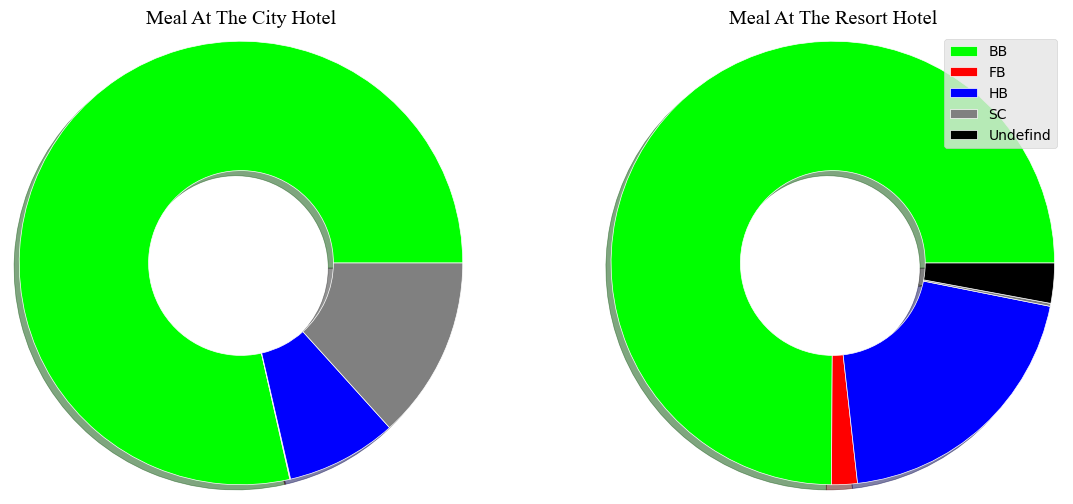

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].pie(meal_by_hotel.loc["City Hotel"].dropna(), radius=1.2, colors=["lime","red","blue","gray"],
        wedgeprops=dict(width=0.7,edgecolor="w"), shadow=True)
axes[0].set_title("Meal At The City Hotel", fontname="Times New Roman")

axes[1].pie(meal_by_hotel.loc["Resort Hotel"], radius=1.2, colors=["lime","red","blue","gray","black"],
        wedgeprops=dict(width=0.7,edgecolor="w"), shadow=True)
axes[1].set_title("Meal At The Resort Hotel", fontname="Times New Roman")


plt.legend(labels=["BB", "FB", "HB", "SC","Undefind"], loc=1)
plt.show()


 - City Hotels show a strong preference for BB (Bed & Breakfast), followed by SC (Self-Catering).
 - Resort Hotels also have a high preference for BB, but HB (Half Board) is more common compared to City Hotels.
 - FB (Full Board) is the least preferred option in both hotel types.

## Conclusions
After these analysis we can figure out that City hotels are more popular among guests(but thier cancellation rete is much higher), and they have better ADR  during a year except in the summers, when we see a significant increase in ADR at Resort hotels.  